# 2022 (German) EmoDB Exploration

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
import librosa
import librosa.display
from IPython.display import Audio

### Get a sample to visualize

In [3]:
SAMPLE_FILE = './wav/03a01Fa.wav'

# load the audio file to get the sample
samples, sample_rate = librosa.load(SAMPLE_FILE, sr = None)

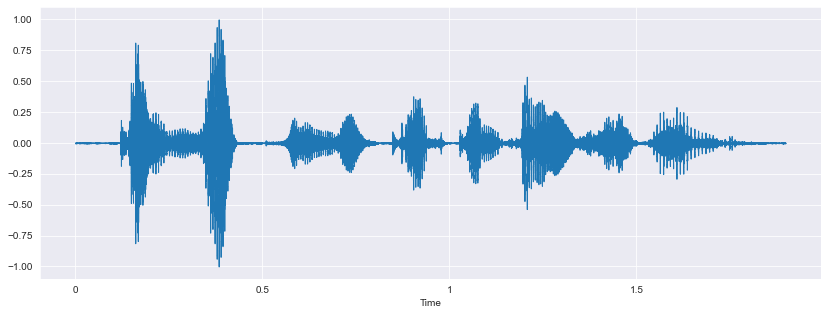

In [6]:
# visualize the sound wave
plt.figure(figsize = (14, 5))
librosa.display.waveshow(samples, sr = sample_rate)

In [10]:
# play the audio directly
Audio(SAMPLE_FILE)

In [11]:
print ('Sample shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))

Sample shape  (30372,) Sample rate  16000 Data type <class 'numpy.ndarray'>


/Users/helloimrosie/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


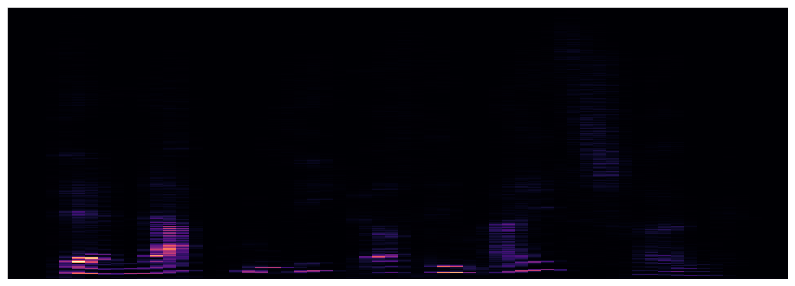

In [76]:
# Spectrograms: plot frequency vs time to indicate the Amplitude of each frequency
plt.figure(figsize = (14, 5))
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

/var/folders/xq/79ls2g8547bdfhql62t94dt00000gn/T/ipykernel_56159/1201249044.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(format='+% dB')


<Figure size 1008x360 with 0 Axes>

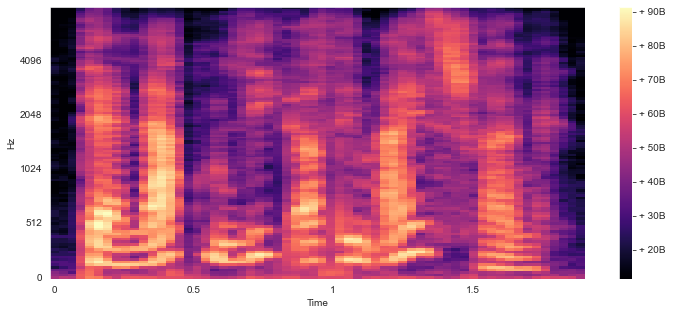

In [85]:
# Modify the to use Mel Scale (a scale of pitches, s.t. each unit is judged by listeners to be equal in pitches distance from the next) instead of Frequency
plt.figure(figsize = (14, 5))
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S = sgram_mag, sr = sample_rate)
# use the decibel scale to get the final Mel Spectrogram
plt.figure(figsize = (12, 5))
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='+% dB')

### Overall Exploration

In [15]:
path = './wav'
entries = os.listdir(path)

In [33]:
emotion_counter = dict()
emotions = {
    'W': 'anger',
    'L': 'boredom',
    'E': 'disgust',
    'A': 'anxiety/fear',
    'F': 'happiness',
    'T': 'sadness',
    'N': 'neutral version'
}

for entry in entries:
    emo = emotions[entry[5]]
    # emo = entry[5]
    if emo not in emotion_counter:
        emotion_counter[emo] = 0
    emotion_counter[emo] += 1

In [40]:
print(f'Total sample number: {len(entries)}')
print(f'Distinct emotion number: {len(emotion_counter)}\n')
print("------ Sample numbers ------")
for emo in emotion_counter:
    print(f'{emo}: {emotion_counter[emo]}')

Total sample number: 535
Distinct emotion number: 7

------ Sample numbers ------
boredom: 81
anger: 127
anxiety/fear: 69
disgust: 46
neutral version: 79
happiness: 71
sadness: 62


In [69]:
# create a dataframe to store filename with its category
df = pd.DataFrame({'fileName': entries})
df['Category'] = df.apply(lambda row: row[0][5], axis=1)

In [70]:
df

,fileName,Category
0,16a02Lb.wav,L
1,14a07Wc.wav,W
2,10a07Ad.wav,A
3,13a05Ea.wav,E
4,14a05Wa.wav,W
...,...,...
530,08b01Fd.wav,F
531,03b02Aa.wav,A
532,09a05Lc.wav,L
533,08a05Lc.wav,L


### Reference
1. [EmoDB Dataset](https://www.kaggle.com/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb)
2. [Auido Deep Learning Made Made Simple (Part 1)](https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5)
2. [Auido Deep Learning Made Made Simple (Part 2)](https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505)